In [ ]:
!git push

Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Username for 'https://github.com': 

In [1]:
import sys
print(sys.version)
!pip list

3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]
Package         Version  
--------------- ---------
absl-py         0.7.1    
astor           0.8.0    
bleach          1.5.0    
cycler          0.10.0   
dask            2.0.0    
decorator       4.4.0    
gast            0.2.2    
grpcio          1.21.1   
h5py            2.6.0    
html5lib        0.9999999
Keras           1.2.2    
kiwisolver      1.1.0    
Markdown        3.1.1    
matplotlib      3.0.3    
networkx        2.3      
numexpr         2.6.9    
numpy           1.16.4   
opencv-python   3.2.0.6  
pandas          0.19.1   
Pillow          6.0.0    
pip             19.1.1   
protobuf        3.8.0    
pyparsing       2.4.0    
python-dateutil 2.8.0    
pytz            2019.1   
PyYAML          5.1.1    
scikit-image    0.12.3   
scipy           1.3.0    
setuptools      39.1.0   
six             1.12.0   
tables          3.4.2    
tensorboard     1.8.0    
tensorflow      1.10.0rc0
termcolor  

In [13]:
deepmoon_path='../DeepCrater/'
sys.path.append(deepmoon_path)
sys.path

['',
 '/home/grosman/projectDC/DeepCrater/technical/deep_crater_env/lib/python3.5/site-packages',
 '',
 '/home/grosman/anaconda3/lib/python35.zip',
 '/home/grosman/anaconda3/lib/python3.5',
 '/home/grosman/anaconda3/lib/python3.5/plat-linux',
 '/home/grosman/anaconda3/lib/python3.5/lib-dynload',
 '/home/grosman/anaconda3/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg',
 '/home/grosman/anaconda3/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg',
 '/home/grosman/anaconda3/lib/python3.5/site-packages',
 '/home/grosman/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/grosman/.ipython',
 '../DeepCrater/']

In [14]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from PIL import Image    # Requires Pillow
import urllib
import cartopy

In [23]:
!mkdir data
data_path = '../data/'
# check if exist here and download data from Zenodo: 
Files = ["dev_craters.hdf5", # - Pandas HDFStore of crater locations and sizes for images in the validation dataset.
         "dev_images.hdf5", # - Input DEM images and output targets of the validation dataset.  Also includes each image's longitude/latitude bounds, and the pixel bounds of the global DEM regions cropped to make each image.
         "LunarLROLrocKaguya_118mperpix.png", # - LRO LOLA and Kaguya Terrain Camera DEM Merge, downsampled to 118 m/pixel and 8 bits/pixel.  The original file can be found at: https://astrogeology.usgs.gov/search/map/Moon/LRO/LOLA/Lunar_LRO_LrocKaguya_DEMmerge_60N60S_512ppd.
         "model_keras1.2.2.h5", # - Keras model weights for the DeepMoon CNN, compatible with Keras version 1.2.2.
         "model_keras2.h5", # - Keras model weights for the DeepMoon CNN, compatible with Keras versions >= 2.0.
         "post-processed_sample_images.zip", # - Contains a set of sample images from the test dataset with the Moon DEM image, new identified craters, CNN target predictions, and ground-truth. The new craters from these images were used to estimate the post-processed false positive rate. See Instructions.txt in .zip file for more details.
         "post-processed_test_craters.npy", # - numpy file containing post-processed craters identified by our pipeline on the test set. Each crater entry is arranged as a tuple: (longitude, latitude, radii), where longitude and latitude are in degrees, and radius is in kilometres. 
         "test_craters.hdf5", # - Pandas HDFStore of crater locations and sizes for images in the test dataset.
         "test_images.hdf5", # - Input DEM images and output targets of the test dataset.  Also includes each image's longitude/latitude bounds, and the pixel bounds of the global DEM regions cropped to make each image.
         "train_craters.hdf5", # - Pandas HDFStore of crater locations and sizes for images in the training dataset.
         "train_images.hdf5"] # - Input DEM images and output targets of the training dataset.  Also includes each image's longitude/latitude bounds, and the pixel bounds of the global DEM regions cropped to make each image.]
Files = Files[2:7]
for file in Files: 
  if os.path.isfile(data_path+file): 
    print('File {} exist in library!'.format(file))
  else: 
    print('File {} does not exist in library. downloading now from Zenodo ...'.format(file))
    URL = "https://zenodo.org/record/1133969/files/"+file
    !wget -P "$data_path" "$URL"
    print('Downloaded into {}'.format(data_path+file))

# download albedo map: 
# ! wget -P DeepMoon/maps/ http://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/cylindrical/jp2/ldam_4.jp2
! wget -P data/ https://upload.wikimedia.org/wikipedia/commons/e/ea/Clementine_albedo_simp750.jpg
! wget -P data/ http://btc.montana.edu/ceres/worlds/landform/moonmercator.jpg
albedo = Image.open("data/Clementine_albedo_simp750.jpg")

mkdir: cannot create directory ‘data’: File exists
File LunarLROLrocKaguya_118mperpix.png exist in library!
File model_keras1.2.2.h5 exist in library!
File model_keras2.h5 exist in library!
File post-processed_sample_images.zip exist in library!
File post-processed_test_craters.npy exist in library!
--2019-07-02 09:48:54--  https://upload.wikimedia.org/wikipedia/commons/e/ea/Clementine_albedo_simp750.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209090 (204K) [image/jpeg]
Saving to: ‘data/Clementine_albedo_simp750.jpg’

Clementine_albedo_s 100%[===================>] 204.19K   922KB/s    in 0.2s    

2019-07-02 09:48:55 (922 KB/s) - ‘data/Clementine_albedo_simp750.jpg’ saved [209090/209090]



# Generate train/dev/test sets out of SLDEM 120 m/pix

In [13]:
import input_data_gen as igen
import utils.processing as proc

# Read source image.
img = Image.open(data_path + "/LunarLROLrocKaguya_118mperpix.png").convert("L")
# Read and combine the LROC and Head datasets (stored under ../catalogues)
craters = igen.ReadLROCHeadCombinedCraterCSV(filelroc=deepmoon_path + "/catalogues/LROCCraters.csv",
                                             filehead=deepmoon_path + "/catalogues/HeadCraters.csv")

fn = 'test_zenodo'
# Generate 10 image/target sets, and corresponding crater dataframes.  np.random.seed is set for consistency.
igen.GenDataset(img, craters, data_path + '/' + fn, amt=10, rawlen_range=[256, 3000]) #, seed=1337

/home/grosman/anaconda3/lib/python3.5/site-packages/PIL/Image.py:2224: DecompressionBombWarning: Image size (2831155200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [31]:
gen_imgs = h5py.File(data_path + '/' + fn + '_images.hdf5', 'r')
sample_data = {'imgs': [gen_imgs['input_images'][...].astype('float32'),
                        gen_imgs['target_masks'][...].astype('float32')]}
proc.preprocess(sample_data)
sd_input_images = sample_data['imgs'][0]
sd_target_masks = sample_data['imgs'][1]

TypeError: Image data can not convert to float

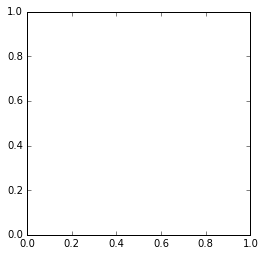

In [50]:
# ! wget -P data/ http://btc.montana.edu/ceres/worlds/landform/moonmercator.jpg
# albedo = Image.open("data/Clementine_albedo_simp750.jpg")
al = Image.open('data/Clementine_albedo_simp750.jpg','r')
# plt.imshow(albedo, extent=[-180, 180, -90, 90], aspect="equal", cmap="Greys_r")
# plt.imshow(al)
plt.imshow(np.asarray(al))

In [46]:
Image.

<module 'PIL.Image' from '/home/grosman/anaconda3/lib/python3.5/site-packages/PIL/Image.py'>

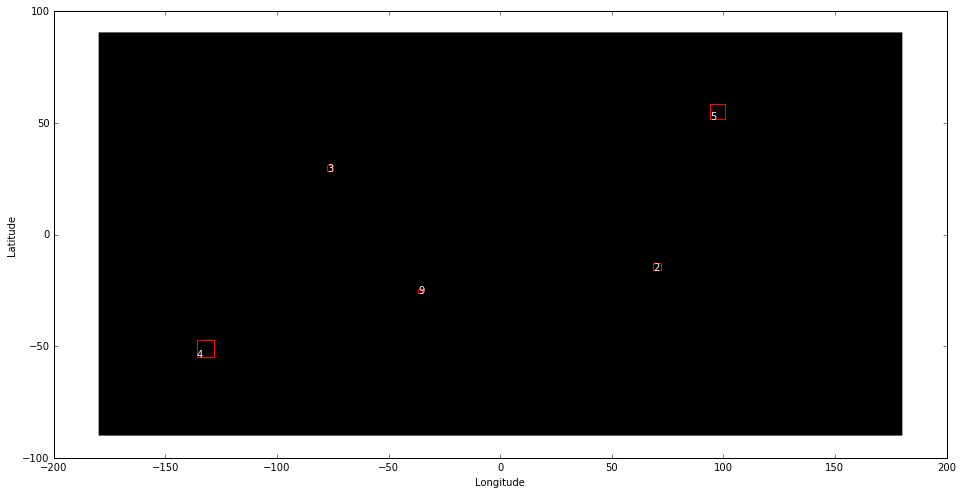

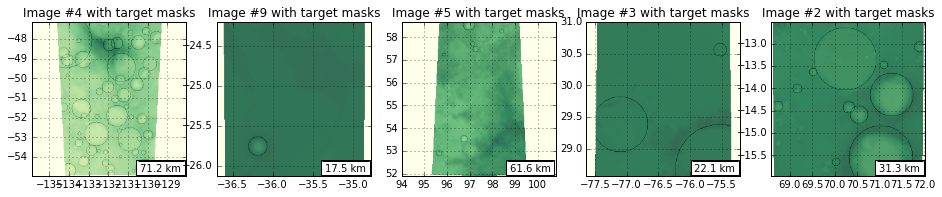

In [37]:
%matplotlib inline
# See 5 images of the set we produced: 
show_subset = np.random.choice(range(len(gen_imgs['cll_xy'])),size=5, replace=False)
fig = plt.figure(figsize=[16, 8])
al_map = plt.imshow(albedo, extent=[-180, 180, -90, 90], aspect="equal", cmap="Greys_r")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
for i in show_subset:
  llon,rlon,llat,ulat=gen_imgs['longlat_bounds']['img_{:02d}'.format(i)][...]
  h1,=plt.plot([llon, llon, rlon, rlon, llon],[llat, ulat, ulat, llat, llat],'r')
  plt.text(llon,llat,str(i), color='w')
  
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
rmoon=1737 #km
kmperdeg = 2*np.pi*rmoon/360 # km per degree transformation

def plot_map_w_scalebar2(ax,train_imgs,im_num):
  im_lims = train_imgs['longlat_bounds']['img_{:02d}'.format(im_num)][...] 
  #streching due to projection: 
#   d=np.diff(im_lims[:2])/np.cos(np.deg2rad(im_lims[2:].mean()))
#   im_lims[0]-=d/2;im_lims[1]+=d/2
  plt.imshow(train_imgs['input_images'][im_num][...], extent=im_lims, origin='upper', 
             cmap='YlGn', aspect='equal') #, vmin=50, vmax=150
  plt.imshow(1-train_imgs['target_masks'][im_num][...], alpha=0.2, extent=im_lims, 
             origin='upper', cmap='Greys_r', aspect='equal')
#   np.cos(np.deg2rad(im_lims[2:].mean()))
  plt.title('Image #{} with target masks'.format(im_num))
  l,r=plt.xlim()
  barlength = 0.3*(r-l)
  bartext = '{:2.1f} km'.format(barlength*kmperdeg)
  bar = AnchoredSizeBar(ax.transData, barlength, bartext, 4)
  ax.add_artist(bar)
  ax.grid()
  return im_lims
  
  
fig2 = plt.figure(figsize=[16, 8])
for i, im_num in enumerate(show_subset):
  ax=plt.subplot(len(show_subset)//5,5,i+1)
  plot_map_w_scalebar2(ax,gen_imgs,im_num)

In [51]:
# Prediction by the model

In [52]:
import keras
keras.__version__

Using TensorFlow backend.


'1.2.2'

In [54]:
from keras.models import load_model
sys.path.append("%s/utils/"%deepmoon_path)
import template_match_target as tmt

# Use the commented out line for Keras 2.0+
# model = load_model(zenodo_path + '/model_keras2.h5')
model = load_model(data_path + '/model_keras1.2.2.h5')

In [57]:
# Use the CNN to make a prediction.  We use [iwant:iwant + 1] to keep input as a 4D tensor.
# Input data MUST BE PREPROCESSED (see proc.preprocess, above) before being passed into model.predict
iwant = show_subset[1]
pred = model.predict(sd_input_images[iwant:iwant + 1])
# Use scikit-image template matching to extract crater locations.  Only search for craters with r >= 3 pixels.
extracted_rings = tmt.template_match_t(pred[0].copy(), minrad=3.)
#
fig = plt.figure(figsize=[16, 16])
[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2)
ax1.imshow(sd_input_images[iwant].squeeze(), origin='upper', cmap='Greys_r', vmin=0, vmax=1.1)
ax2.imshow(sd_target_masks[iwant].squeeze(), origin='upper', cmap='Greys_r')
ax3.imshow(pred[0], origin='upper', cmap='Greys_r', vmin=0, vmax=1)
ax4.imshow(sd_input_images[iwant].squeeze(), origin='upper', cmap="Greys_r")
for x, y, r in extracted_rings:
    circle = plt.Circle((x, y), r, color='blue', fill=False, linewidth=2, alpha=0.5)
    ax4.add_artist(circle)
ax1.set_title('Moon DEM Image')
ax2.set_title('Ground-Truth Target Mask')
ax3.set_title('CNN Predictions')
ax4.set_title('Post-CNN Craters')
plt.show()

AttributeError: 'Figure' object has no attribute 'subplots'